# DESCARGAR MLFLOW DESDE DOCKER


Descargar Docker y la imgen que vamos a usar

docker pull ubuntu/mlflow:2.1.1_1.0-22.04

Comprobar con que id se ejecuta vuestro Visual

In [ ]:
!id

Crear un directorio en la maquina local para compartirlo con el contenedor 

In [10]:
# /mnt/data 

Crear el contedor de la imagen Docker

### Script de Consola para Ejecutar MLflow en Docker

Este script está diseñado para ejecutar MLflow en un contenedor Docker. A continuación se explica cómo ejecutarlo por primera vez y la funcionalidad de los parámetros utilizados.

* Ejecuta el contenedor en segundo plano.
```bash
		-d:
```
* Exponemos el puerto 5000 para acceder a MLflow desde el navegador.
```bash
		-p 5000:5000:
```
* Pondremos el usuario con el que se ejecuta nuestro visual Studio .
```bash
        !id
		-user 1000:1000
```

* Monta el directorio local actual ($PWD) en /mnt/data dentro del contenedor.
```bash
		-v $PWD:/mnt/data:
```

* Configura SQLite como backend de almacenamiento en la ruta local montada.
```bash
		sqlite:///mnt/data/mlflow.db:
``` 

* Carpeta dentro del contenedor donde se guardarán los artefactos (también se mapea a la carpeta local).
```bash
		/mnt/data/mlruns: 
```

### Ejecutar el Contenedor por Primera Vez

```bash
sudo docker run -d --name mlflow-container -p 5000:5000 \
  --user 1000:1000 \
  -v $PWD:/mnt/data \
  ubuntu/mlflow:2.1.1_1.0-22.04 mlflow server \
  --backend-store-uri sqlite:///mnt/data/mlflow.db \
  --default-artifact-root /mnt/data/mlruns \
  --host 0.0.0.0

### Entrar localhost

http://localhost:5000

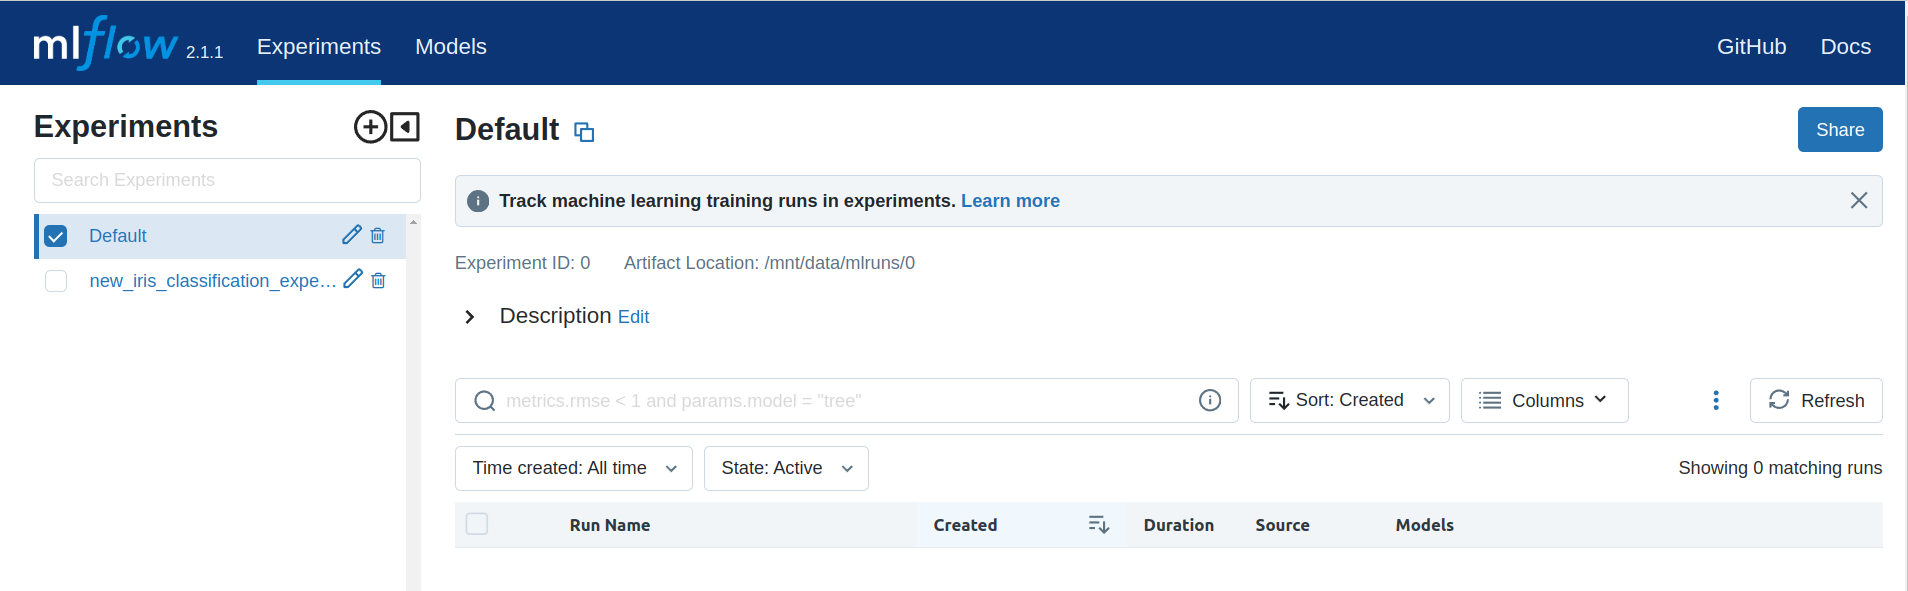

### PARA EJECUTARLO EN SIGUIENTES INTERACCIONES 

```bash
sudo docker start mlflow-container
```

# CODIGO DE PRUEBA

In [ ]:
!id

In [1]:
import mlflow
from datetime import datetime

# Conectar a MLflow
mlflow.set_tracking_uri("http://localhost:5000")

# Definir el experimento
mlflow.set_experiment("new_iris_classification_experiment_01")
dia_hora_min = datetime.now().strftime("%d_%H_%M")

In [2]:
# Informacion para MLFLOW
info_name = f"Ejecucion_{dia_hora_min}"
info_modelo = "RandomForest"
info_dataset = "Iris"
info_estado_entranamiento = "Completado"
info_descripcion = "Entrenamiento de un modelo RandomForest para clasificar el dataset Iris"

In [6]:
"""
Actualiza un experimento en MLflow con los parámetros, métricas y modelo entrenado.

Esta función establece un experimento en MLflow, registra los parámetros del modelo, 
las métricas (como la precisión) y guarda el modelo entrenado como un artefacto dentro del experimento.

Parámetros:
-----------
info_modelo : str
    El tipo de modelo utilizado, por ejemplo "RandomForest" o cualquier otro que se registre como una etiqueta (tag).

info_dataset : str
    El nombre del dataset utilizado, como "Iris", "MNIST", etc. Este valor se guarda como una etiqueta.

info_estado_entrenamiento : str
    El estado del entrenamiento del modelo, como "Completed" o "In Progress". Se registra como una etiqueta.

accuracy : float
    La métrica de precisión del modelo entrenado, que se registrará en el experimento.

n_estimators : int
    El número de árboles en el modelo de RandomForest, que se registrará como un parámetro.

max_depth : int
    La profundidad máxima de los árboles en el modelo de RandomForest, que se registrará como un parámetro.

random_state : int
    La semilla aleatoria utilizada para entrenar el modelo de RandomForest, que se registrará como un parámetro.

model : sklearn.base.BaseEstimator
    El modelo entrenado (en este caso un RandomForestClassifier), que se guardará como un artefacto en el experimento.

Ejemplo de uso:
---------------
actualizar_experimento_mlflow(
    info_modelo="RandomForest",
    info_dataset="Iris",
    info_estado_entrenamiento="Completed",
    accuracy=0.95,
    n_estimators=100,
    max_depth=3,
    random_state=42,
    model=random_forest_model
)

Notas:
------
Esta función usa el seguimiento de experimentos de MLflow para registrar los parámetros,
métricas y artefactos. Los artefactos pueden ser modelos entrenados, imágenes, o cualquier
archivo que desees guardar en el experimento. Al registrar el modelo, este se guarda 
como un artefacto que podrá ser utilizado o descargado en futuras ejecuciones.
"""

def actualizar_experimento_mlflow(  
                                    info_modelo,
                                    info_dataset,
                                    info_estado_entrenamiento,
                                    accuracy,
                                    n_estimators,
                                    max_depth,
                                    random_state,
                                    model,
                                    descripcion):

    # Registrar etiquetas (tags) para la ejecución
    mlflow.set_tag("model_type", info_modelo)
    mlflow.set_tag("dataset", info_dataset)
    mlflow.set_tag("training_status", info_estado_entrenamiento)
    mlflow.set_tag("description", descripcion) 
    
    # Registrar parámetros del modelo
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("random_state", random_state)

    # Registrar la métrica de precisión
    mlflow.log_metric("accuracy", accuracy)

    # Guardar el modelo en MLflow
    #mlflow.sklearn.log_model(model, "model")

In [3]:
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Cargar datos
iris = load_iris()
X = iris.data
y = iris.target
random_state = 60

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [7]:
# Iniciar un nuevo experimento
with mlflow.start_run(run_name=info_name):
    n_estimators = 140
    max_depth = 15

    # Entrenar el modelo
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Calcular la métrica (precisión)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Actualizar el experimento en MLflow
    actualizar_experimento_mlflow(  info_modelo=info_modelo,
                                    info_dataset=info_dataset,
                                    info_estado_entrenamiento=info_estado_entranamiento,
                                    accuracy=accuracy,
                                    n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    random_state=random_state,
                                    model=model,
                                    descripcion=info_descripcion)
    
    # Al final del contexto, MLflow guardará automáticamente todos los registros
    print(f"Modelo guardado en el experimento: {mlflow.active_run().info.run_id}")

Modelo guardado en el experimento: 845e67b7b6e5432a93fa2ab0b815278a
🏃 View run Ejecucion_03_12_42 at: http://localhost:5000/#/experiments/3/runs/845e67b7b6e5432a93fa2ab0b815278a
🧪 View experiment at: http://localhost:5000/#/experiments/3
